In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
basedir = 'results'
res_dirs = sorted(os.listdir(basedir))
res_dirs[:10]

['result_0 (0.305425)',
 'result_1',
 'result_10 (0.306609)',
 'result_11',
 'result_12 (0.306715)',
 'result_13 (0.305309)',
 'result_14',
 'result_15 (0.306592)',
 'result_16 (0.305776)',
 'result_17 (0.305067)']

In [14]:
tar_file = 'file_3.txt'
all_res = None
for rd in res_dirs:
    run_id = rd.split(' ')[0].split('_')[1]
    #print(run_id)
    rdpath = os.path.join(basedir, rd)
    fpath = os.path.join(rdpath, tar_file)
    df = pd.read_csv(fpath, header=None, names=['fitness'])
    df['run_id'] = run_id
    df.index.name = 'generation'
    df = df.reset_index()
    #print(df.head())
    print(run_id, len(df))
    if len(df.loc[df.fitness==0])>0:
        dropfrom = df.loc[df.fitness==0].index[0]
        df.drop(list(range(dropfrom, len(df))), inplace=True)
    print(run_id, len(df))
    if all_res is None:
        all_res = df
    else:
        all_res = all_res.append(df)
    #break
len(all_res)/len(res_dirs)

0 3967
0 3967
1 5000
1 5000
10 5141
10 5141
11 4810
11 4810
12 3542
12 3542
13 4236
13 4236
14 3376
14 3376
15 3123
15 3123
16 4120
16 4120
17 3716
17 3716
18 4052
18 4052
19 5001
19 5001
2 5000
2 5000
20 3964
20 3964
21 3589
21 3589
22 3630
22 3630
23 4661
23 4661
24 3763
24 3763
25 4109
25 4109
26 3995
26 3995
27 2983
27 2983
28 3517
28 3517
29 4417
29 4417
3 6000
3 6000
30 3017
30 3017
4 6000
4 6000
5 4389
5 4389
6 2837
6 2837
7 6000
7 3633
8 6000
8 4025
9 6000
9 4323
a 6000
a 2933
b 6000
b 3294
c 6000
c 2885
d 6000
d 3330
e 6000
e 3023
f 6000
f 2185
g 6000
g 3925
h 6000
h 3803
i 6000
i 2791
j 6000
j 4796
k 6000
k 4354
l 6000
l 3831
m 6000
m 4023
n 6000
n 4382
o 6000
o 4803
p 6000
p 3587
q 6000
q 4663
r 6000
r 4406
s 2719
s 2719
t 2567
t 2567
u 3097
u 3097
v 2323
v 2323
w 3140
w 3140
x 3029
x 3029
y 4268
y 4268
z 4783
z 4783


3875.0175438596493

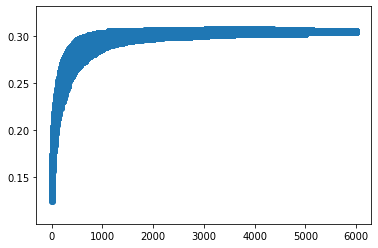

In [15]:
plt.scatter(all_res['generation'], all_res['fitness'])

In [16]:
all_res.head()

,generation,fitness,run_id
0,0,0.139762,0
1,1,0.143799,0
2,2,0.149530,0
3,3,0.149530,0
4,4,0.149530,0


In [28]:
maxfit = pd.DataFrame(all_res.groupby('run_id')['fitness'].max())
maxfit = maxfit.reset_index()
maxfit.head()

,run_id,fitness
0,0,0.305425
1,1,0.303138
2,10,0.306609
3,11,0.304993
4,12,0.306715


In [30]:
sortmaxfit = maxfit.sort_values('fitness', ascending=False)
max50 = sortmaxfit.run_id.tolist()[:50]

In [32]:
print(max50)

['k', 'g', '12', 'y', '10', '15', 'd', 'j', '25', '16', '24', 'r', '28', 'b', 'n', 's', '0', '30', '22', '27', '13', '23', '9', 'a', '29', 'o', 'z', '17', 'u', '11', '20', 'v', 't', '4', 'l', 'p', 'h', '3', '8', '26', '7', 'm', '18', '21', 'e', '14', '5', 'q', 'i', 'x']


In [36]:
res_dirs_max50 = []
for rid in max50:
    temp = 'result_{}'.format(rid)
    temp2 = ''
    for rd in res_dirs:
        if rd[:len(temp)]==temp:
            temp2 = rd
            break
    res_dirs_max50.append(temp2)
    

In [44]:
tar_file1 = 'file_1.txt'
tar_file2 = 'file_6.txt'
tar_file3 = 'file_7.txt'

all_res2 = None

for rid, rd in zip(max50, res_dirs_max50):
    rdpath = os.path.join(basedir, rd)
    fpath1 = os.path.join(rdpath, tar_file1)
    fpath2 = os.path.join(rdpath, tar_file2)
    fpath3 = os.path.join(rdpath, tar_file3)
    df = all_res[all_res['run_id']==rid]
    
    df1 = pd.read_csv(fpath1, header=None, names=['fit_1'], nrows=len(df))
    df2 = pd.read_csv(fpath2, header=None, names=['fit_2'], nrows=len(df))
    df3 = pd.read_csv(fpath3, header=None, names=['fit_3'], nrows=len(df))
    print(rid, len(df), len(df1), len(df2), len(df3))
    df = df.join(df1)
    df = df.join(df2)
    df = df.join(df3)
    #print(df.head())
    if all_res2 is None:
        all_res2 = df
    else:
        all_res2 = all_res2.append(df)
    #break

k 4354 4354 4354 4354
g 3925 3925 3925 3925
12 3542 3542 3542 3542
y 4268 4268 4268 4268
10 5141 5141 5141 5141
15 3123 3123 3123 3123
d 3330 3330 3330 3330
j 4796 4796 4796 4796
25 4109 4109 4109 4109
16 4120 4120 4120 4120
24 3763 3763 3763 3763
r 4406 4406 4406 4406
28 3517 3517 3517 3517
b 3294 3294 3294 3294
n 4382 4382 4382 4382
s 2719 2719 2719 2719
0 3967 3967 3967 3967
30 3017 3017 3017 3017
22 3630 3630 3630 3630
27 2983 2983 2983 2983
13 4236 4236 4236 4236
23 4661 4661 4661 4661
9 4323 4323 4323 4323
a 2933 2933 2933 2933
29 4417 4417 4417 4417
o 4803 4803 4803 4803
z 4783 4783 4783 4783
17 3716 3716 3716 3716
u 3097 3097 3097 3097
11 4810 4810 4810 4810
20 3964 3964 3964 3964
v 2323 2323 2323 2323
t 2567 2567 2567 2567
4 6000 6000 6000 6000
l 3831 3831 3831 3831
p 3587 3587 3587 3587
h 3803 3803 3803 3803
3 6000 6000 6000 6000
8 4025 4025 4025 4025
26 3995 3995 3995 3995
7 3633 3633 3633 3633
m 4023 4023 4023 4023
18 4052 4052 4052 4052
21 3589 3589 3589 3589
e 3023 3023 3

In [48]:
all_res2.head()

,generation,fitness,run_id,fit_1,fit_2,fit_3
0,0,0.138409,k,45.915189,12674,488
1,1,0.138409,k,45.915189,12674,488
2,2,0.138821,k,49.327768,10112,445
3,3,0.138821,k,49.327768,10112,445
4,4,0.139381,k,45.851819,12651,493


In [49]:
all_res2['fit_1b'] = all_res2['fit_1']/100.
all_res2['fit_2b'] = all_res2['fit_2']/14500.
all_res2['fit_3b'] = all_res2['fit_3']/1415.

In [50]:
all_res2.head()

,generation,fitness,run_id,fit_1,fit_2,fit_3,fit_1b,fit_2b,fit_3b
0,0,0.138409,k,45.915189,12674,488,0.459152,0.874069,0.344876
1,1,0.138409,k,45.915189,12674,488,0.459152,0.874069,0.344876
2,2,0.138821,k,49.327768,10112,445,0.493278,0.697379,0.314488
3,3,0.138821,k,49.327768,10112,445,0.493278,0.697379,0.314488
4,4,0.139381,k,45.851819,12651,493,0.458518,0.872483,0.348410


## data for figure 11

In [54]:
all_res2_grouped = all_res2.groupby('run_id')['fitness', 'fit_1b', 'fit_2b', 'fit_3b'].last()
all_res2_grouped.head()

,fitness,fit_1b,fit_2b,fit_3b
run_id,,,,
0,0.305425,0.572568,0.977724,0.545583
10,0.306609,0.572806,0.977310,0.547703
11,0.304993,0.576007,0.973034,0.544170
12,0.306715,0.575556,0.976759,0.545583
13,0.305309,0.574907,0.977172,0.543463


In [55]:
all_res2_grouped.mean()

fitness    0.305058
fit_1b     0.574229
fit_2b     0.976143
fit_3b     0.544240
dtype: float64

In [56]:
all_res2_grouped.loc['k']

fitness    0.306982
fit_1b     0.575381
fit_2b     0.975379
fit_3b     0.546996
Name: k, dtype: float64

## figure 8

In [57]:
all_res2.head()

,generation,fitness,run_id,fit_1,fit_2,fit_3,fit_1b,fit_2b,fit_3b
0,0,0.138409,k,45.915189,12674,488,0.459152,0.874069,0.344876
1,1,0.138409,k,45.915189,12674,488,0.459152,0.874069,0.344876
2,2,0.138821,k,49.327768,10112,445,0.493278,0.697379,0.314488
3,3,0.138821,k,49.327768,10112,445,0.493278,0.697379,0.314488
4,4,0.139381,k,45.851819,12651,493,0.458518,0.872483,0.348410


In [63]:
all_res2_mean = all_res2.groupby('generation')['fitness', 'fit_1b', 'fit_2b', 'fit_3b'].mean()
all_res2_mean = all_res2_mean.reset_index()
all_res2_mean.head()

,generation,fitness,fit_1b,fit_2b,fit_3b
0,0,0.133335,0.465018,0.843877,0.330488
1,1,0.134468,0.463790,0.850654,0.334629
2,2,0.136798,0.473187,0.834960,0.330954
3,3,0.138347,0.470987,0.843659,0.337300
4,4,0.140663,0.472819,0.849117,0.341216


In [64]:
all_res2_max = all_res2.groupby('generation')['fitness', 'fit_1b', 'fit_2b', 'fit_3b'].max()
all_res2_max = all_res2_max.reset_index()
all_res2_max.head()

,generation,fitness,fit_1b,fit_2b,fit_3b
0,0,0.142482,0.517803,0.917034,0.351943
1,1,0.146623,0.517803,0.917034,0.362544
2,2,0.149530,0.524612,0.917034,0.362544
3,3,0.149530,0.524612,0.917034,0.377385
4,4,0.149530,0.524612,0.917034,0.377385


In [67]:
all_res2_min = all_res2.groupby('generation')['fitness', 'fit_1b', 'fit_2b', 'fit_3b'].min()
all_res2_min = all_res2_min.reset_index()
all_res2_min.head()

,generation,fitness,fit_1b,fit_2b,fit_3b
0,0,0.124793,0.423264,0.700897,0.279152
1,1,0.125121,0.423264,0.700897,0.279152
2,2,0.127199,0.423264,0.683034,0.280565
3,3,0.129346,0.423621,0.683034,0.291873
4,4,0.129346,0.441937,0.694828,0.281979


In [68]:
best = all_res2[all_res2['run_id']=='k']
best = best[['generation', 'fitness', 'fit_1b', 'fit_2b', 'fit_3b']]
best.head()

,generation,fitness,fit_1b,fit_2b,fit_3b
0,0,0.138409,0.459152,0.874069,0.344876
1,1,0.138409,0.459152,0.874069,0.344876
2,2,0.138821,0.493278,0.697379,0.314488
3,3,0.138821,0.493278,0.697379,0.314488
4,4,0.139381,0.458518,0.872483,0.348410


In [84]:
sns.set(font_scale=1.2, style='ticks')

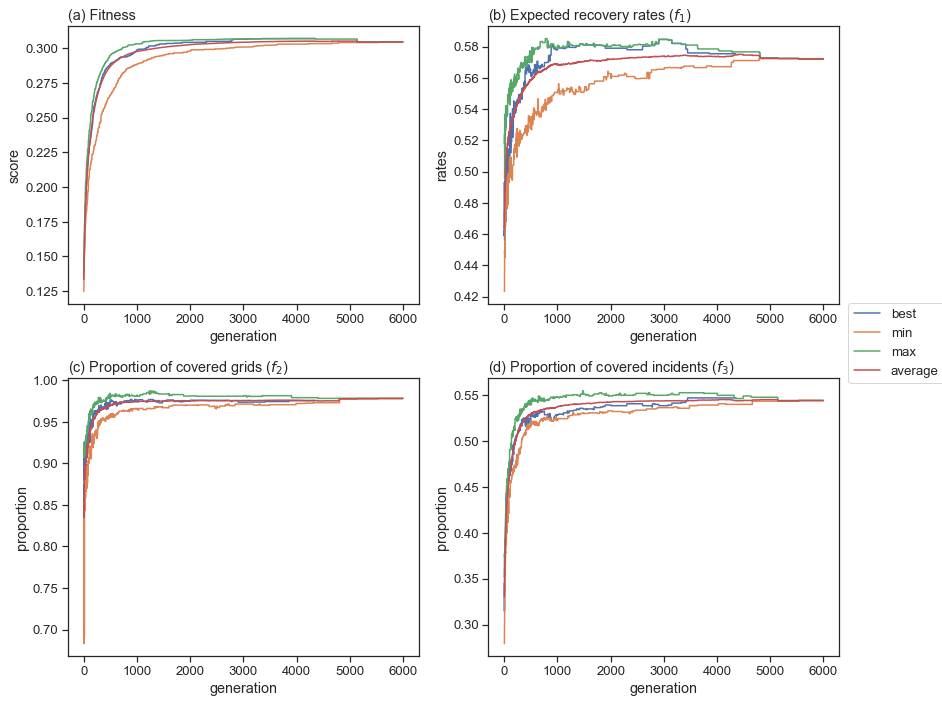

In [88]:
fig, axg = plt.subplots(2, 2, figsize=(12, 10))
axs = axg.flatten()

#sns.pointplot('generation', 'fitness', data=all_res2, ax=axs[0])
cols = ['fitness', 'fit_1b', 'fit_2b', 'fit_3b']
for i in range(len(cols)):
    ax = axs[i]
    col = cols[i]
    ax.plot(best['generation'], best[col], label='best')
    ax.plot(all_res2_min['generation'], all_res2_min[col], label='min')
    ax.plot(all_res2_max['generation'], all_res2_max[col], label='max')
    ax.plot(all_res2_mean['generation'], all_res2_mean[col], label='average')
    
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.10, 0.5))

labs = 'abcd'
labs2 = ['Fitness', 'Expected recovery rates ($f_1$)', 'Proportion of covered grids ($f_2$)', 'Proportion of covered incidents ($f_3$)']
ylabs = ['score', 'rates', 'proportion', 'proportion']
ymax = [0.32, 0.6, 1.00, 0.53]
i = 0
for ax in axs:
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left')
    ax.set_xlabel('generation')
    #ax.set_ylim([0, ymax[i]])
    ax.set_ylabel(ylabs[i])
    i+=1

plt.tight_layout()
plt.savefig('newFigure_08.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')
